### <b>I<span style='color:#16C2D5'>|</span> Import libraries</b> 

In [63]:
import pandas as pd
import os
import numpy as np
from scipy.stats import skew
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif,chi2
# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

### <b>II <span style='color:#16C2D5'>|</span> Input the data</b> 

In [3]:
data = pd.read_csv("gen_info_final.csv")

# <span style="color:#E888BB; font-size: 1%;">1 | EXPLORATORY DATA ANALYSIS</span><span style='color:black'>1 | EXPLORATORY DATA ANALYSIS </span></b> </div>

In [4]:
#Visualize the Dataframe
data

,Unnamed: 0,ID,STATE,GENDER,INCOME,WEIGHT,BMI,RACE,AGE,DIABETES,...,PERSONAL_DOC,CHECKUP1,HRT_ATTACK,HRT_DISEASE,STROKE,ARTHRITIS,_SMOKER3,DIFFWALK,EDUCATION,HEIGHT
0,1,1,1.0,FEMALE,3.0,6804.0,Over_Weight,White,13.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,Never,0.0,Grad_HS_Y,63.0
1,2,2,1.0,FEMALE,6.0,6350.0,Over_Weight,White,8.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,Never,0.0,College_Y,62.0
2,4,4,1.0,FEMALE,3.0,5398.0,Normal_Weight,White,5.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,Never,0.0,College_N,62.0
3,6,6,1.0,FEMALE,5.0,6260.0,Normal_Weight,Black,13.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,Prev_Smoker,0.0,College_Y,65.0
4,7,7,1.0,FEMALE,5.0,7348.0,Over_Weight,White,13.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,Never,0.0,Grad_HS_Y,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246045,353265,445126,78.0,MALE,5.0,10433.0,Obese,White,3.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,Never,0.0,College_Y,72.0
246046,353266,445127,78.0,FEMALE,1.0,6985.0,Over_Weight,Black,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,Never,0.0,Grad_HS_Y,65.0
246047,353267,445128,78.0,FEMALE,5.0,8301.0,Over_Weight,Black,7.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,Never,0.0,College_Y,67.0
246048,353269,445130,78.0,MALE,5.0,10886.0,Obese,Black,11.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,Never,0.0,College_N,72.0


In [5]:
data = data.iloc[: , 1:]

In [6]:
#Check the dimension of the data
data.shape

(246050, 24)

In [7]:
#Finding the null values for each column
data.isnull().sum()

ID               0
STATE            0
GENDER           0
INCOME           0
WEIGHT           0
BMI              0
RACE             0
AGE              0
DIABETES         0
PHYSHLTH         0
MENTHLTH         0
EXERCISE         0
SLEEP            0
HLT_INSURANCE    0
PERSONAL_DOC     0
CHECKUP1         0
HRT_ATTACK       0
HRT_DISEASE      0
STROKE           0
ARTHRITIS        0
_SMOKER3         0
DIFFWALK         0
EDUCATION        0
HEIGHT           0
dtype: int64

### <b><span style='color:#16C2D5'>|</span> Uniqueness</b> 

In [8]:
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

ID: 246050 distinct values
STATE: 54 distinct values
GENDER: 2 distinct values
INCOME: 7 distinct values
WEIGHT: 501 distinct values
BMI: 4 distinct values
RACE: 7 distinct values
AGE: 13 distinct values
DIABETES: 4 distinct values
PHYSHLTH: 31 distinct values
MENTHLTH: 31 distinct values
EXERCISE: 2 distinct values
SLEEP: 23 distinct values
HLT_INSURANCE: 11 distinct values
PERSONAL_DOC: 3 distinct values
CHECKUP1: 5 distinct values
HRT_ATTACK: 2 distinct values
HRT_DISEASE: 2 distinct values
STROKE: 2 distinct values
ARTHRITIS: 2 distinct values
_SMOKER3: 4 distinct values
DIFFWALK: 2 distinct values
EDUCATION: 4 distinct values
HEIGHT: 123 distinct values


In [9]:
data.dtypes

ID                 int64
STATE            float64
GENDER            object
INCOME           float64
WEIGHT           float64
BMI               object
RACE              object
AGE              float64
DIABETES         float64
PHYSHLTH         float64
MENTHLTH         float64
EXERCISE         float64
SLEEP            float64
HLT_INSURANCE    float64
PERSONAL_DOC     float64
CHECKUP1         float64
HRT_ATTACK       float64
HRT_DISEASE      float64
STROKE           float64
ARTHRITIS        float64
_SMOKER3          object
DIFFWALK         float64
EDUCATION         object
HEIGHT           float64
dtype: object

### <b><span style='color:#16C2D5'>|</span> Describe the Data</b> 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246050 entries, 0 to 246049
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             246050 non-null  int64  
 1   STATE          246050 non-null  float64
 2   GENDER         246050 non-null  object 
 3   INCOME         246050 non-null  float64
 4   WEIGHT         246050 non-null  float64
 5   BMI            246050 non-null  object 
 6   RACE           246050 non-null  object 
 7   AGE            246050 non-null  float64
 8   DIABETES       246050 non-null  float64
 9   PHYSHLTH       246050 non-null  float64
 10  MENTHLTH       246050 non-null  float64
 11  EXERCISE       246050 non-null  float64
 12  SLEEP          246050 non-null  float64
 13  HLT_INSURANCE  246050 non-null  float64
 14  PERSONAL_DOC   246050 non-null  float64
 15  CHECKUP1       246050 non-null  float64
 16  HRT_ATTACK     246050 non-null  float64
 17  HRT_DISEASE    246050 non-nul

## <span style='color:black'> 2. Univariate Analysis</span></b> </div>

### <b>I <span style='color:#16C2D5'>|</span> Diabete</b> 

In [11]:
#How many Diabetes?
selected_column = 'DIABETES'

# Plot the distribution using matplotlib
value_counts = data[selected_column].value_counts()
value_counts

0.0    204208
1.0     34006
4.0      5699
2.0      2137
Name: DIABETES, dtype: int64

In [12]:
data.DIABETES[data.DIABETES < 3] = 1
data.DIABETES[data.DIABETES > 2] = 0

In [13]:
data.DIABETES.unique()

array([1., 0.])

In [14]:
D = data[(data['DIABETES'] == 1)]
H = data[(data['DIABETES'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['DIABETES'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['DIABETES'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['DIABETES'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [60]:
target_count()
target_percent()

### <b>I<span style='color:#16C2D5'>|</span> Histogram for all Colounm</b> 

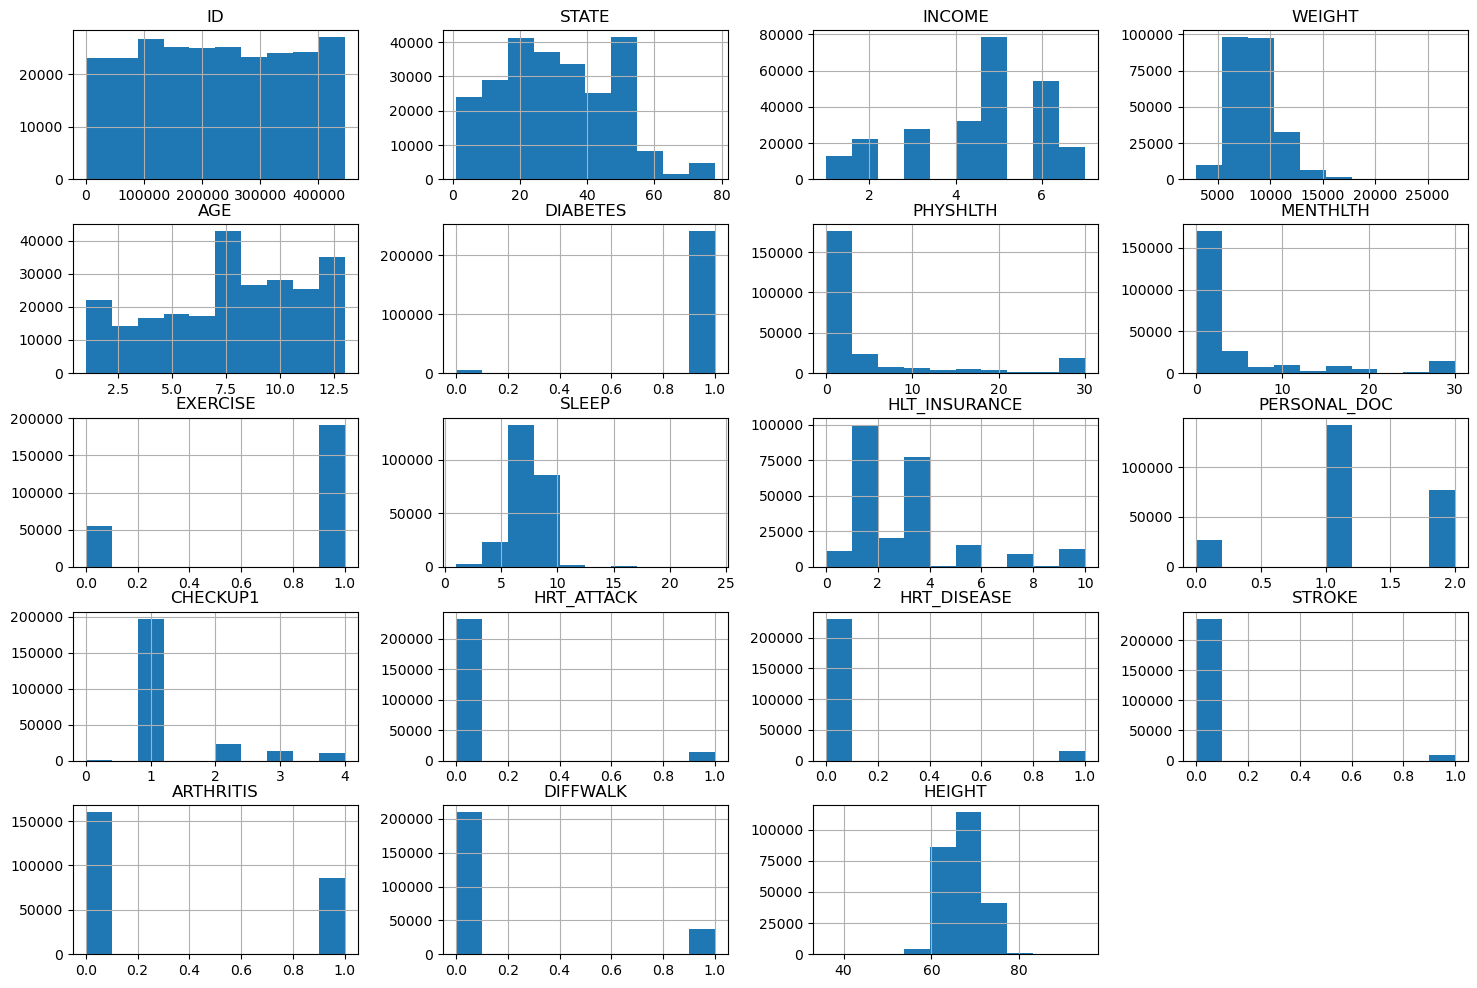

In [16]:
data.hist(figsize=(18,12))
plt.show()

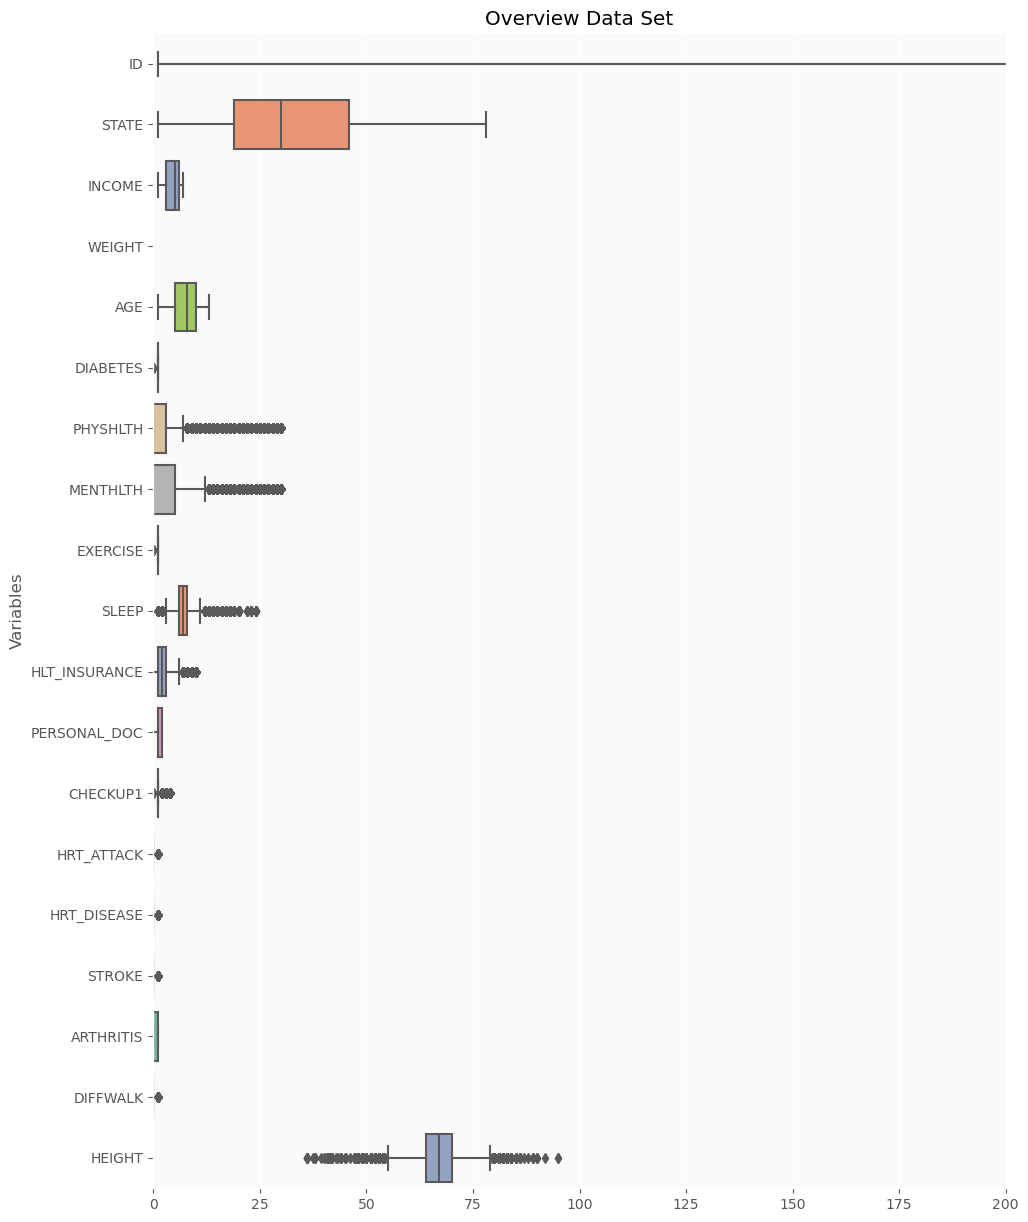

In [17]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

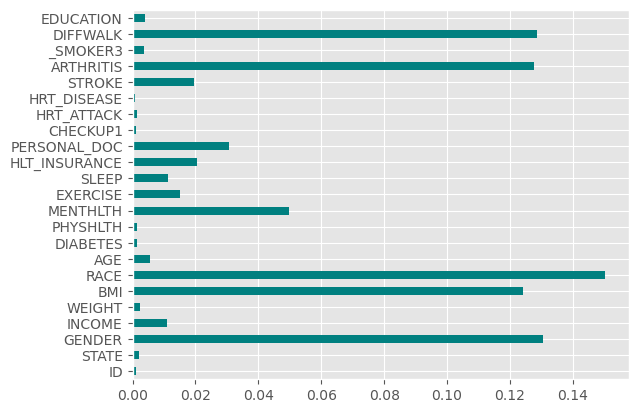

In [18]:
selected_column = 'DIABETES'
y = data[selected_column]
X_df = data.drop(columns=['DIABETES'])
encoder = ce.LeaveOneOutEncoder(return_df=True)
X = encoder.fit_transform(X_df, y)
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [21]:
X.shape

(246050, 23)

In [45]:
selector = SelectKBest(mutual_info_classif, k=5)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

(246050, 5)

In [46]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['GENDER', 'BMI', 'RACE', '_SMOKER3', 'EDUCATION']

In [65]:
for i in list(data.columns):
    for j in list(data.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(data[i]).reshape(-1, 1), np.array(data[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

NameError: name 'resultant' is not defined

## <span style='color:black'> Multivariate analysis</span></b> </div>

In [ ]:
# Correlation Coefficient

In [24]:
data.corr()

,ID,STATE,INCOME,WEIGHT,AGE,DIABETES,PHYSHLTH,MENTHLTH,EXERCISE,SLEEP,HLT_INSURANCE,PERSONAL_DOC,CHECKUP1,HRT_ATTACK,HRT_DISEASE,STROKE,ARTHRITIS,DIFFWALK,HEIGHT
ID,1.000000,0.990212,-0.023073,0.011744,-0.010641,-0.007067,0.004549,0.001510,-0.001686,0.004026,-0.009596,-0.020202,0.005484,-0.002947,-0.003596,-0.008989,0.001888,0.004619,-0.002494
STATE,0.990212,1.000000,-0.042704,0.005528,-0.006149,-0.010666,0.005249,-0.001189,-0.009997,0.002102,-0.004428,-0.022880,0.001482,-0.002591,-0.003348,-0.008959,0.001485,0.009918,-0.013220
INCOME,-0.023073,-0.042704,1.000000,0.029914,-0.102743,0.049554,-0.228015,-0.167611,0.230887,0.006769,-0.289473,0.056653,-0.003395,-0.108280,-0.083162,-0.115410,-0.153600,-0.288290,0.181358
WEIGHT,0.011744,0.005528,0.029914,1.000000,-0.073103,-0.044344,0.076954,0.041171,-0.095673,-0.054642,-0.007700,0.005484,-0.010297,0.037218,0.045369,0.004563,0.066257,0.118718,0.471620
AGE,-0.010641,-0.006149,-0.102743,-0.073103,1.000000,-0.043563,0.092766,-0.187221,-0.113140,0.128044,0.162535,0.196398,-0.233628,0.175574,0.204598,0.135233,0.380859,0.238841,-0.102505
DIABETES,-0.007067,-0.010666,0.049554,-0.044344,-0.043563,1.000000,-0.031444,-0.014867,0.022281,0.009830,-0.027551,-0.015775,0.030687,-0.012671,-0.015229,-0.007728,-0.042416,-0.040495,0.021630
PHYSHLTH,0.004549,0.005249,-0.228015,0.076954,0.092766,-0.031444,1.000000,0.307779,-0.246419,-0.055808,0.117363,0.119072,-0.061808,0.136532,0.153233,0.127672,0.238777,0.439038,-0.051136
MENTHLTH,0.001510,-0.001189,-0.167611,0.041171,-0.187221,-0.014867,0.307779,1.000000,-0.113858,-0.131139,0.055872,0.014913,0.047014,0.024994,0.025500,0.040694,0.063988,0.160028,-0.059610
EXERCISE,-0.001686,-0.009997,0.230887,-0.095673,-0.113140,0.022281,-0.246419,-0.113858,1.000000,0.007465,-0.082923,-0.009074,0.029612,-0.084121,-0.082496,-0.080933,-0.128565,-0.282646,0.088255
SLEEP,0.004026,0.002102,0.006769,-0.054642,0.128044,0.009830,-0.055808,-0.131139,0.007465,1.000000,0.015787,0.024180,-0.052893,0.003713,0.011718,0.012688,-0.008893,-0.018857,-0.009841


In [25]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

In [26]:
correlation_plot()

In [27]:
correlation_matrix = data.corr()['DIABETES'].sort_values(ascending=False)

# Print or visualize the correlation values
print(correlation_matrix)

DIABETES         1.000000
INCOME           0.049554
CHECKUP1         0.030687
EXERCISE         0.022281
HEIGHT           0.021630
SLEEP            0.009830
ID              -0.007067
STROKE          -0.007728
STATE           -0.010666
HRT_ATTACK      -0.012671
MENTHLTH        -0.014867
HRT_DISEASE     -0.015229
PERSONAL_DOC    -0.015775
HLT_INSURANCE   -0.027551
PHYSHLTH        -0.031444
DIFFWALK        -0.040495
ARTHRITIS       -0.042416
AGE             -0.043563
WEIGHT          -0.044344
Name: DIABETES, dtype: float64


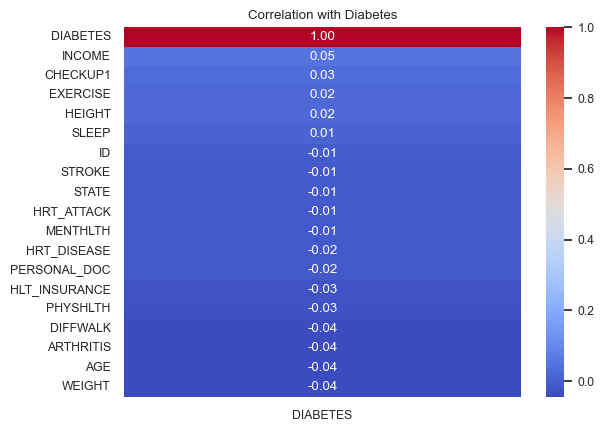

In [28]:
# Sort correlation values in descending order
correlation_matrix_sorted = correlation_matrix .sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(correlation_matrix_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [39]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    au_corr = au_corr['DIABETES'].sort_values(ascending=False)
    return au_corr[0:n]

In [52]:
print(get_top_abs_correlations(data, 5))

DIABETES     1.000000
INCOME       0.049554
WEIGHT       0.044344
AGE          0.043563
ARTHRITIS    0.042416
dtype: float64


best feature： ‘GENDER', 'BMI', 'RACE', '_SMOKER3', 'EDUCATION'，’INCOME‘, 'WEIGHT', 'AGE', 'ARTHRITIS'

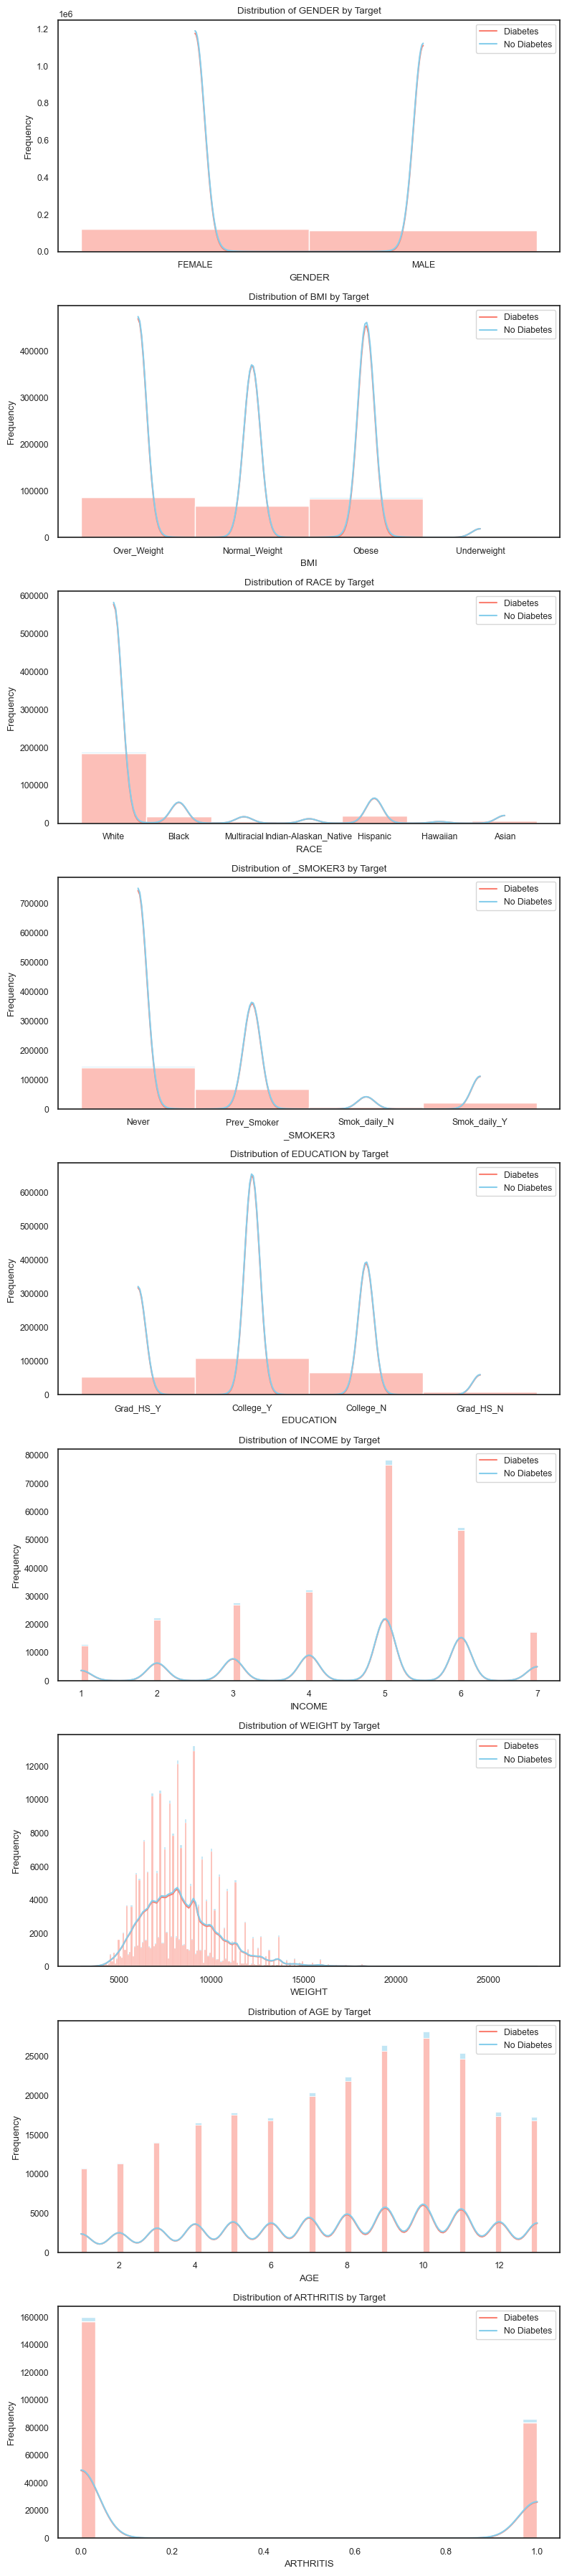

In [62]:
features = data.drop('DIABETES', axis=1)
sns.set_palette("pastel")

best_features = features[['GENDER', 'BMI', 'RACE', '_SMOKER3','EDUCATION','INCOME', 'WEIGHT', 'AGE', 'ARTHRITIS']]

# Plot distribution of each feature according to the target variable
fig, axes = plt.subplots(nrows=len(best_features.columns), ncols=1, figsize=(8, 4 * len(best_features.columns)))

for i, feature in enumerate(best_features.columns):
    sns.histplot(data=data, x=feature, hue='DIABETES', multiple='stack', ax=axes[i], kde=True, palette={0: 'skyblue', 1: 'salmon'})
    axes[i].set_title(f'Distribution of {feature} by Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(['Diabetes', 'No Diabetes'])

# Adjust spacing
plt.tight_layout()

# Show the plot
fig.savefig('Features.png')
plt.show()

‘GENDER', 'BMI', 'RACE', '_SMOKER3', 'EDUCATION'，’INCOME‘, 'WEIGHT', 'AGE', 'ARTHRITIS'